In [1]:
import krakenex
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
k = krakenex.API()

pair = 'XETHZUSD'

ohlc = pd.DataFrame (k.query_public('OHLC', data = {'pair': pair, 'interval' : 1,'since': None})['result'][pair])

ohlc.columns = [
                'time', 'open', 'high', 'low', 'close',
                'vwap', 'volume', 'count',]

print(ohlc)

           time     open     high      low    close     vwap       volume  \
0    1670655120  1264.76  1264.76  1264.76  1264.76     0.00   0.00000000   
1    1670655180  1264.76  1264.76  1264.76  1264.76  1264.76   0.03000000   
2    1670655240  1264.76  1264.76  1264.76  1264.76     0.00   0.00000000   
3    1670655300  1264.76  1264.76  1264.76  1264.76  1264.76   0.05108592   
4    1670655360  1264.76  1264.76  1264.76  1264.76     0.00   0.00000000   
..          ...      ...      ...      ...      ...      ...          ...   
715  1670698020  1270.82  1271.85  1270.82  1271.85  1271.24   5.12726385   
716  1670698080  1271.84  1271.85  1271.84  1271.85  1271.84   1.72260933   
717  1670698140  1271.85  1271.85  1271.85  1271.85     0.00   0.00000000   
718  1670698200  1271.85  1272.76  1271.85  1272.76  1272.16  10.04194172   
719  1670698260  1272.47  1272.47  1272.00  1272.00  1272.15   4.11494152   

     count  
0        0  
1        1  
2        0  
3        1  
4        0

In [4]:


#df = pd.DataFrame(resp['result'][pair])
#plt.bar(df[0], df[1])
#plt.show()
#clear
# print(df)

In [3]:
ohlc['date'] = pd.to_datetime(ohlc.time)

In [4]:
print(ohlc)

           time     open     high      low    close     vwap       volume  \
0    1670655120  1264.76  1264.76  1264.76  1264.76     0.00   0.00000000   
1    1670655180  1264.76  1264.76  1264.76  1264.76  1264.76   0.03000000   
2    1670655240  1264.76  1264.76  1264.76  1264.76     0.00   0.00000000   
3    1670655300  1264.76  1264.76  1264.76  1264.76  1264.76   0.05108592   
4    1670655360  1264.76  1264.76  1264.76  1264.76     0.00   0.00000000   
..          ...      ...      ...      ...      ...      ...          ...   
715  1670698020  1270.82  1271.85  1270.82  1271.85  1271.24   5.12726385   
716  1670698080  1271.84  1271.85  1271.84  1271.85  1271.84   1.72260933   
717  1670698140  1271.85  1271.85  1271.85  1271.85     0.00   0.00000000   
718  1670698200  1271.85  1272.76  1271.85  1272.76  1272.16  10.04194172   
719  1670698260  1272.47  1272.47  1272.00  1272.00  1272.15   4.11494152   

     count                          date  
0        0 1970-01-01 00:00:01.6

In [6]:
fig = go.Figure(data=[go.Candlestick(x=ohlc['date'],
                open=ohlc['open'],
                high=ohlc['high'],
                low=ohlc['low'],
                close=ohlc['close'])])
fig.show()

In [7]:
#ohlc.Series (x) .rolling (window = n) .mean (). iloc [n-1:]. values
ohlc['media_movil'] = ohlc.open.rolling(window=3).mean()

<AxesSubplot: xlabel='date'>

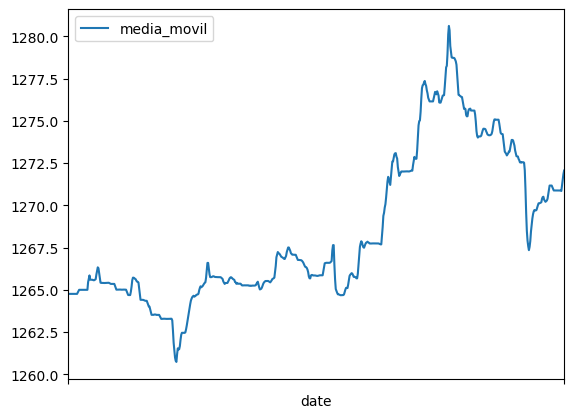

In [8]:
ohlc.plot(x = 'date', y = 'media_movil')

In [9]:
ohlc['diff'] = ohlc['close'].apply(lambda x: float(x)).diff(1)

In [10]:
pos, neg = ohlc['diff'] > 0, ohlc['diff'] <= 0

In [11]:
ohlc['gain'] = ohlc['diff']

In [12]:
##Obtener los pares de monedas

In [13]:
assetPairs = k.query_public('AssetPairs')

In [14]:
list(assetPairs['result'].keys())

['1INCHEUR',
 '1INCHUSD',
 'AAVEAUD',
 'AAVEETH',
 'AAVEEUR',
 'AAVEGBP',
 'AAVEUSD',
 'AAVEXBT',
 'ACAEUR',
 'ACAUSD',
 'ACHEUR',
 'ACHUSD',
 'ADAAUD',
 'ADAETH',
 'ADAEUR',
 'ADAGBP',
 'ADAUSD',
 'ADAUSDT',
 'ADAXBT',
 'ADXEUR',
 'ADXUSD',
 'AGLDEUR',
 'AGLDUSD',
 'AIREUR',
 'AIRUSD',
 'AKTEUR',
 'AKTUSD',
 'ALCXEUR',
 'ALCXUSD',
 'ALGOETH',
 'ALGOEUR',
 'ALGOGBP',
 'ALGOUSD',
 'ALGOUSDT',
 'ALGOXBT',
 'ALICEEUR',
 'ALICEUSD',
 'ALPHAEUR',
 'ALPHAUSD',
 'ANKREUR',
 'ANKRGBP',
 'ANKRUSD',
 'ANKRXBT',
 'ANTETH',
 'ANTEUR',
 'ANTUSD',
 'ANTXBT',
 'APEEUR',
 'APEUSD',
 'APEUSDT',
 'API3EUR',
 'API3USD',
 'APTEUR',
 'APTUSD',
 'ARPAEUR',
 'ARPAUSD',
 'ASTREUR',
 'ASTRUSD',
 'ATLASEUR',
 'ATLASUSD',
 'ATOMAUD',
 'ATOMETH',
 'ATOMEUR',
 'ATOMGBP',
 'ATOMUSD',
 'ATOMUSDT',
 'ATOMXBT',
 'AUDIOEUR',
 'AUDIOUSD',
 'AUDJPY',
 'AUDUSD',
 'AVAXEUR',
 'AVAXUSD',
 'AVAXUSDT',
 'AXSEUR',
 'AXSUSD',
 'BADGEREUR',
 'BADGERUSD',
 'BALETH',
 'BALEUR',
 'BALUSD',
 'BALXBT',
 'BANDEUR',
 'BANDUSD',
 'BATET

In [15]:
serie = ohlc['close'].apply(lambda x: float(x)).diff(1)

In [16]:
serie

0       NaN
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
715    0.99
716    0.00
717    0.00
718    0.91
719   -0.76
Name: close, Length: 720, dtype: float64

In [17]:
up = serie.clip(lower=0)

In [18]:
down = serie.clip(upper=0)

In [19]:
up

0       NaN
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
715    0.99
716    0.00
717    0.00
718    0.91
719    0.00
Name: close, Length: 720, dtype: float64

In [20]:
down*=-1

In [21]:
down

0       NaN
1     -0.00
2     -0.00
3     -0.00
4     -0.00
       ... 
715   -0.00
716   -0.00
717   -0.00
718   -0.00
719    0.76
Name: close, Length: 720, dtype: float64

In [22]:
down.mean()

0.07157162726008319

In [23]:
ma_up = up.rolling(window = 14).mean()
ma_down = down.rolling(window = 14).mean()

rsi = ma_up / ma_down
rsi = 100 - (100/(1 + rsi))

In [24]:
rsi

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
715    75.757576
716    97.087379
717    97.087379
718    98.453608
719    70.740741
Name: close, Length: 720, dtype: float64